In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [3]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [4]:
print("--- 1. Data Acquisition and Loading ---")

try:
    # Ensure 'train.csv' is in the same directory as your Jupyter Notebook
    df = pd.read_csv('train.csv')
    print("Dataset 'train.csv' loaded successfully!")
except FileNotFoundError:
    print("Error: train.csv not found. Please make sure the file is in the same directory as your notebook.")
    exit()

print("\nFirst 5 rows of the dataset:")
print(df.head())


--- 1. Data Acquisition and Loading ---
Dataset 'train.csv' loaded successfully!

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [5]:
print("\n--- 2. Exploratory Data Analysis (EDA) ---")

# 2.1 Initial Data Inspection
print("\n2.1 Initial Data Inspection:")
print("\nDataset Information:")
df.info()


--- 2. Exploratory Data Analysis (EDA) ---

2.1 Initial Data Inspection:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(891, 12)


In [8]:
print("\n2.2 Missing Values Analysis:")
print("\nMissing Values Count per Column:")
print(df.isnull().sum())


2.2 Missing Values Analysis:

Missing Values Count per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print("\nPercentage of Missing Values per Column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))


Percentage of Missing Values per Column:
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


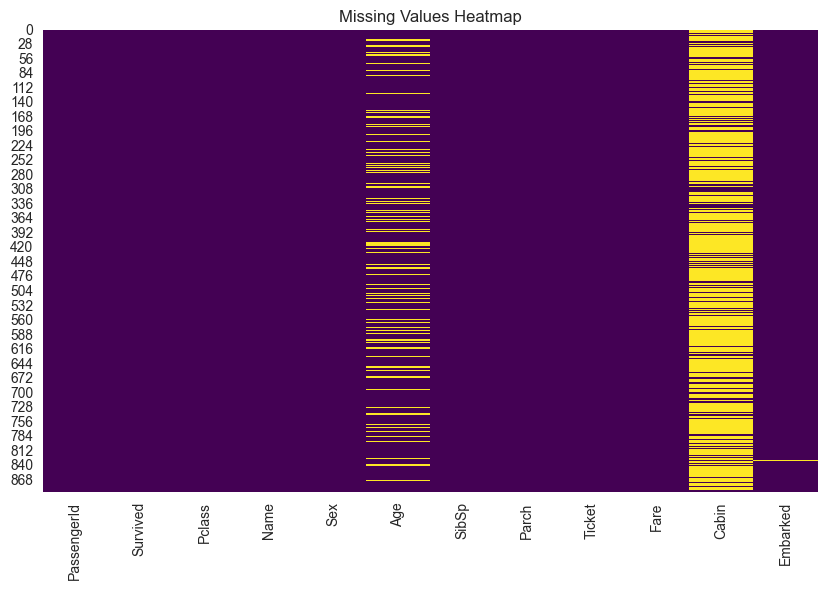

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


2.3 Distribution Analysis (Univariate):


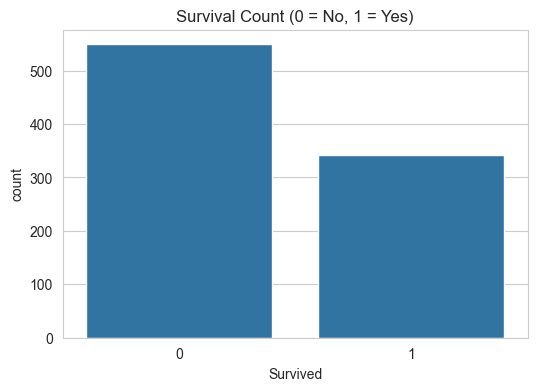

Survival Counts and Proportions:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [22]:
print("\n2.3 Distribution Analysis (Univariate):")
# Distribution of 'Survived' (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()
print("Survival Counts and Proportions:\n", df['Survived'].value_counts(normalize=True))

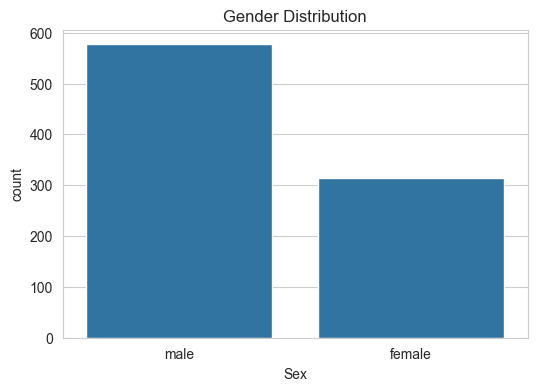

Gender Counts and Proportions:
 Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()
print("Gender Counts and Proportions:\n", df['Sex'].value_counts(normalize=True))

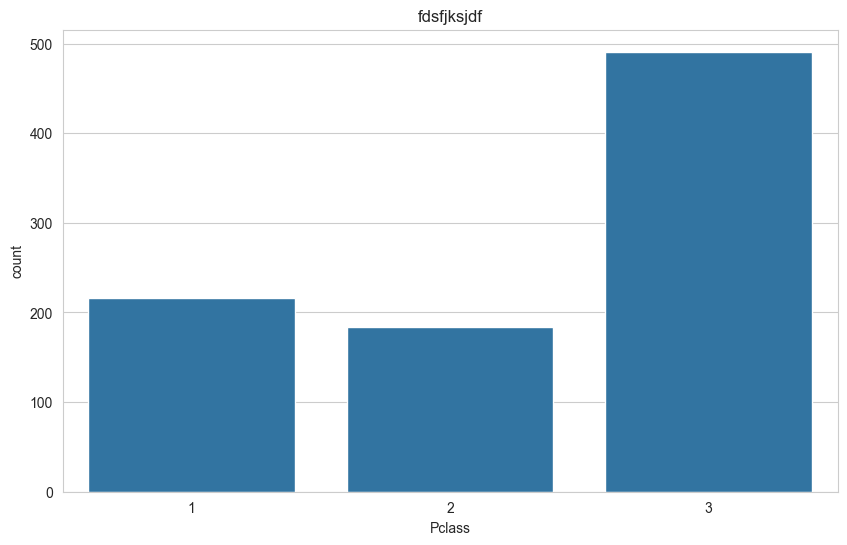

distribution:  Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', data=df)
plt.title("fdsfjksjdf")
plt.show()
print("distribution: ",df['Pclass'].value_counts(normalize=True))

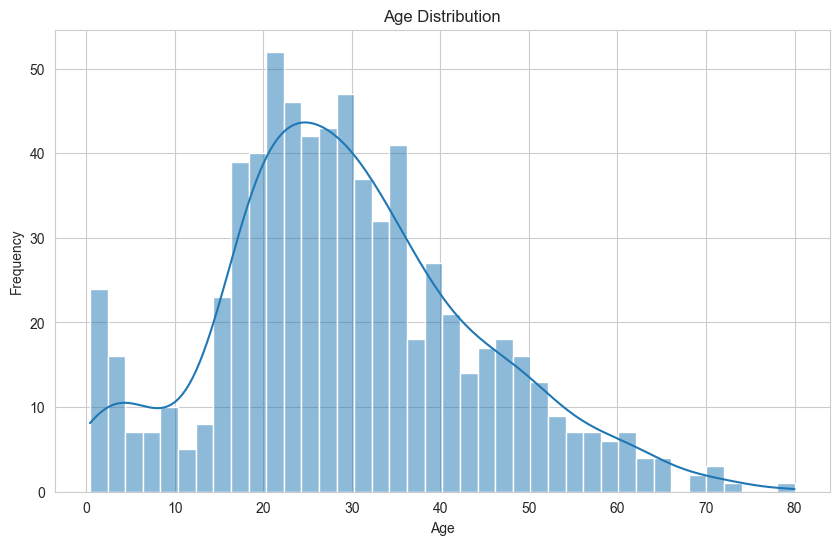

In [35]:
# Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=40, kde=True) # dropna to exclude missing values for plotting
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

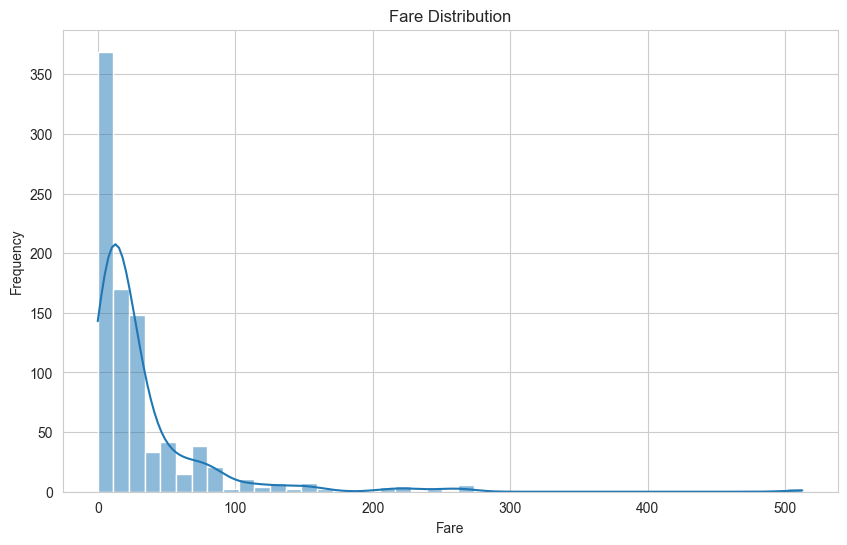

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=45, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



2.4 Correlation Analysis (Bivariate and Multivariate):


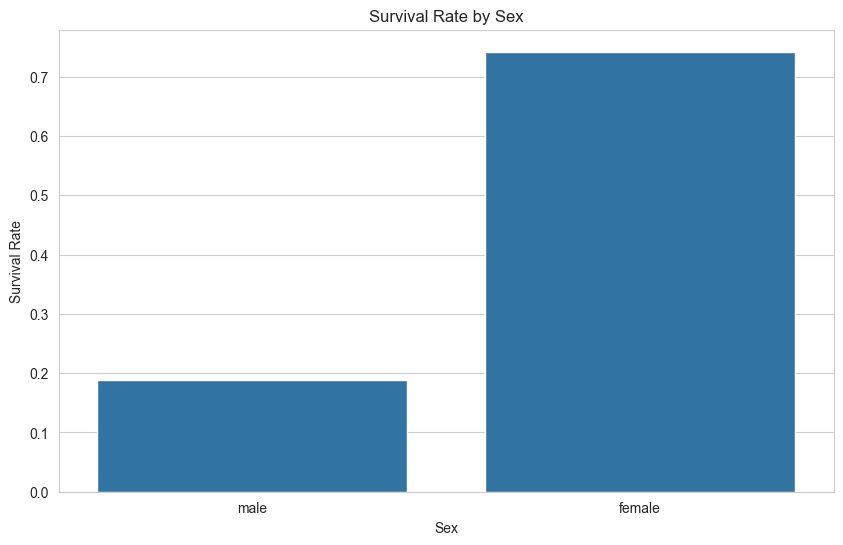

In [46]:
print("\n2.4 Correlation Analysis (Bivariate and Multivariate):")
# Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()